## Initial value problem with Scipy

**syntax** : `scipy.integrate.odeint(func,y,x,args=())`

$\frac{dx}{dt}=\cos(2t)+\sin(3t),x(0)=1$

In [1]:
from scipy.integrate import odeint

In [2]:
import numpy as np
import matplotlib.pyplot as plt

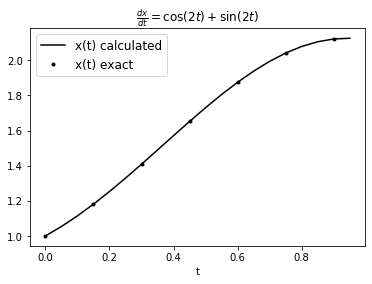

In [3]:
def f(x,t):
    return np.cos(2*t)+np.sin(3*t)
x0=1
t=np.arange(0.0,1.0,0.05)
x=odeint(f,x0,t)
x1=0.5*np.sin(2*t)-(1/3)*np.cos(3*t)+4/3

plt.plot(t,x,'k',label='x(t) calculated')
plt.plot(t,x1,'k.',markevery=3,label='x(t) exact')
plt.legend(loc='best',prop={'size':12})
plt.title(r'$\frac{dx}{dt}=\cos(2t)+\sin(2t)$')
plt.xlabel('t')
plt.show()

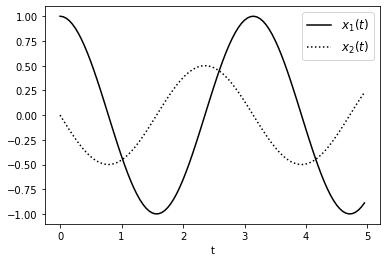

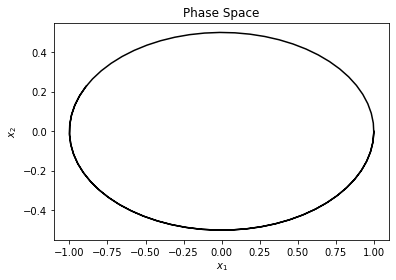

In [5]:
def f1(t,pr1,x12):
    return pr1[0]*x12[0]+pr1[1]*x12[1]
def f2(t,pr2,x12):
    return pr2[0]*x12[0]+pr2[1]*x12[1]
def f(x12,t,pr1,pr2):
    dx1dt=f1(t,pr1,x12)
    dx2dt=f2(t,pr2,x12)
    return [dx1dt,dx2dt]
t0,x1,x2=0,1,0 # initial values t0,x1(t=t0),x2(t=t0)
dt,T=0.05,5 # increment of t and last point of t
pr1,pr2=[0,4],[-1,0] # parameters for funcs f1(t,pr1,..) and f2(t,pr2,..)
t=np.arange(t0,T,dt) # create t-array,t=[t0,..,T]
x=odeint(f,[x1,x2],t,args=tuple([pr1,pr2]))
x1=x[:,0]
x2=x[:,1]

plt.plot(t,x1,'k',t,x2,'k:')
plt.legend([r'$x_1(t)$',r'$x_2(t)$'],loc='best',prop={'size':12})
plt.xlabel('t')
plt.show()
plt.plot(x1,x2,'k')
plt.title('Phase Space')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

## Solve ODE with Different algorithms

Solve ordinary differential equation with user choosen algorithm

**syntax** : `scipy.integrate.solve_ivp(func,t_span,y0,method='RK45',t_eval=None)`

```
Methods include
RK45 ==> Default, Runge-Kutta fourth order
RK23 ==> Runge-Kutta second order
LSODA ==> LSODA algorithm
BDF ==> Implicit multi-step method
```

In [6]:
from scipy.integrate import solve_ivp

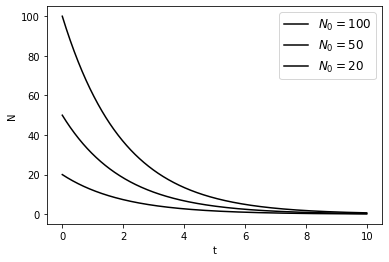

In [7]:
def f(x,y):
    return -0.5*y
t0,T=0,10 # two values of t_span
y0=[100,50,20] # array of y0
tRange=np.arange(t0,T,0.01) # array of t_eval
sol=solve_ivp(f,[t0,T],y0,method='RK23',t_eval=tRange)
plt.plot(tRange,sol.y[0],'k',label=r'$N_0=$%d'%y0[0]) # 1st init cond
plt.plot(tRange,sol.y[1],'k',label=r'$N_0=$%d'%y0[1]) # 2nd init cond
plt.plot(tRange,sol.y[2],'k',label=r'$N_0=$%d'%y0[2]) # 3rd init cond
plt.legend(loc='best',prop={'size':12})
plt.xlabel('t')
plt.ylabel('N')
plt.show()